In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("profiles_revised.csv.zip", low_memory=False)

In [2]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
df['offspring'] = df['offspring'].str.replace("&rsquo;", "'")
df['pets'] = df['pets'].str.replace("&rsquo;", "'")

In [4]:
col_to_drop = ['body_type', 'drugs', 'height', 'offspring', 'orientation', 'sign', 'status']
df.drop(columns=col_to_drop, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        59946 non-null  int64 
 1   diet       35551 non-null  object
 2   drinks     56961 non-null  object
 3   education  53318 non-null  object
 4   ethnicity  54266 non-null  object
 5   income     59946 non-null  int64 
 6   job        51748 non-null  object
 7   pets       40025 non-null  object
 8   religion   39720 non-null  object
 9   sex        59946 non-null  object
 10  smokes     54434 non-null  object
 11  speaks     59896 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.5+ MB


In [6]:
df["drinks"].value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder

df = df[df['drinks'] != 'desperately']
mode = df['drinks'].mode()[0]
df.fillna(value={'drinks': mode}, inplace=True)
oe = OrdinalEncoder(categories=[['not at all', 'rarely', 'socially', 'often', 'very often']])
oe.fit(df[['drinks']]) 
df['drinks'] = oe.transform(pd.DataFrame(df['drinks']))

In [8]:
df['diet'].fillna(value='not specified', inplace=True)

In [9]:
diet_types = ["anything", "other", "vegetarian", "vegan", "kosher", "halal"]
for diet_type in diet_types:
    df[f'diet_{diet_type}'] = 0
    df.loc[df['diet'].str.contains(f'mostly {diet_type}'), f'diet_{diet_type}'] = 1
    df.loc[df['diet'].str.contains(f'{diet_type}'), f'diet_{diet_type}'] = 2
    df.loc[df['diet'].str.contains(f'strictly {diet_type}'), f'diet_{diet_type}'] = 3

In [10]:
#ethn_list = ["asian", "middle eastern", "black", "native american", "indian", "pacific islander", "Hispanic/latin", "white", "other"]
#df['ethnicity'].fillna(value='other', inplace=True)
df['ethnicity'] = df['ethnicity'].str.split(',').str[0]
df['ethnicity'].replace({'asian': 'Asian', 'white':'Caucasian', 'hispanic / latin': 'Hispanic/Latin',
                            'pacific islander': 'Pacific Islander', 'black': 'Black', 'middle eastern': 'Middle Eastern',
                            'native american': 'Native American', 'indian': 'Indian'}, inplace=True)

In [11]:
df["ethnicity"].value_counts()

Caucasian           33305
Asian                8166
Hispanic/Latin       4364
Black                3058
other                1690
Indian               1193
Middle Eastern        806
Pacific Islander      713
Native American       702
Name: ethnicity, dtype: int64

In [12]:
df["education"].value_counts()

graduated from college/university    23858
graduated from masters program        8936
working on college/university         5683
working on masters program            1673
graduated from two-year college       1526
graduated from high school            1427
graduated from ph.d program           1259
graduated from law school             1114
working on two-year college           1068
dropped out of college/university      982
working on ph.d program                975
college/university                     800
graduated from space camp              643
dropped out of space camp              499
graduated from med school              443
working on space camp                  433
working on law school                  268
two-year college                       220
working on med school                  212
dropped out of two-year college        188
dropped out of masters program         138
masters program                        135
dropped out of ph.d program            126
dropped out

In [13]:
df['education'].fillna(value='not specified', inplace=True)

education_types = ["college/university", "masters program", "ph.d program", "law school", "med school",
                   "high school", "two-year college", "space camp"]
for education_type in education_types:
    df[f'education_{education_type}'] = 0
    df.loc[df['education'].str.contains(f'dropped out of {education_type}'), f'education_{education_type}'] = 1
    df.loc[df['education'].str.contains(f'working on {education_type}'), f'education_{education_type}'] = 2
    df.loc[df['education'].str.contains(f'graduated from {education_type}'), f'education_{education_type}'] = 3

In [14]:
df["pets"].value_counts()

likes dogs and likes cats          14740
likes dogs                          7199
likes dogs and has cats             4285
has dogs                            4120
has dogs and likes cats             2324
likes dogs and dislikes cats        2024
has dogs and has cats               1454
has cats                            1400
likes cats                          1051
has dogs and dislikes cats           544
dislikes dogs and likes cats         238
dislikes dogs and dislikes cats      187
dislikes cats                        121
dislikes dogs and has cats            77
dislikes dogs                         44
Name: pets, dtype: int64

In [15]:
df['pets'].fillna(value='not specified', inplace=True)
pets_types = ["dogs", "cats"]
for pet_type in pets_types:
    df[f'{pet_type}'] = 0
    df.loc[df['pets'].str.contains(f'dislikes {pet_type}'), f'{pet_type}'] = -1
    df.loc[df['pets'].str.contains(f'has {pet_type}'), f'{pet_type}'] = 1
    df.loc[df['pets'].str.contains(f'likes {pet_type}'), f'{pet_type}'] = 2

In [16]:
df['religion'].fillna(value='not specified', inplace=True)
religion_types = ["agnosticism", "atheism", "christianity", "catholicism", "judaism", "buddhism", "hinduism", "islam", "other"]
for religion_type in religion_types:
    df[f'religion_{religion_type}'] = 0
    df.loc[df['religion'].str.contains(f'{religion_type}'), f'religion_{religion_type}'] = 1
    df.loc[df['religion'].str.contains(f'{religion_type} and laughing about it'), f'religion_{religion_type}'] = 2
    df.loc[df['religion'].str.contains(f'{religion_type} but not too serious about it'), f'religion_{religion_type}'] = 3
    df.loc[df['religion'].str.contains(f'{religion_type} and somewhat serious about it'), f'religion_{religion_type}'] = 4
    df.loc[df['religion'].str.contains(f'{religion_type} and very serious about it'), f'religion_{religion_type}'] = 5

In [17]:
mode = df['smokes'].mode()[0]
df.fillna(value={'smokes': mode}, inplace=True)
oe = OrdinalEncoder(categories=[["yes", "sometimes", "when drinking", "trying to quit", "no"]])
oe.fit(df[['smokes']]) 
df['smokes'] = oe.transform(pd.DataFrame(df['smokes']))

In [18]:
df.loc[(df['job'].isnull()) & (df['income'] == -1), 'job'] = 'rather not say'
df.loc[(df['job'].isnull()) & (df['income'] == 0), 'job'] = 'unemployed'
df["job"].value_counts()

rather not say                       8239
other                                7547
student                              4859
science / tech / engineering         4823
computer / hardware / software       4685
artistic / musical / writer          4396
sales / marketing / biz dev          4382
medicine / health                    3665
education / academia                 3501
executive / management               2367
banking / financial / real estate    2260
entertainment / media                2241
law / legal services                 1369
hospitality / travel                 1355
construction / craftsmanship         1016
clerical / administrative             802
political / government                700
transportation                        365
unemployed                            269
retired                               246
military                              202
Name: job, dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['job']]).toarray())
enc_df.columns = enc.get_feature_names(['job'])
df = pd.concat([df, enc_df], axis=1)
df = df.drop(columns=['job'])

C:\Users\aaama\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
columns_to_drop = ['religion', 'pets', 'education', 'diet', 'income']
df.drop(columns_to_drop, axis=1, inplace=True)

In [22]:
df.shape

(59944, 53)

In [23]:
df.head(30)

,age,drinks,ethnicity,sex,smokes,speaks,diet_anything,diet_other,diet_vegetarian,diet_vegan,...,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed,job_nan
0,22.0,2.0,Asian,m,1.0,english,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,36.0,3.0,Caucasian,m,4.0,"english (fluently), spanish (poorly), french (...",0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,2.0,NaN,m,4.0,"english, french, c++",2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.0,2.0,Caucasian,m,4.0,"english, german (poorly)",0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,30.0,2.0,Asian,m,4.0,english,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,28.0,2.0,Caucasian,m,4.0,"english (fluently), chinese (okay)",2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,32.0,2.0,Caucasian,f,4.0,english,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,30.0,2.0,Caucasian,f,4.0,"english, spanish (okay)",2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25.0,2.0,Caucasian,f,2.0,english,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,37.0,0.0,Caucasian,m,4.0,english (fluently),2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
df.to_csv("preprocessed_data.csv")

Text(0.5, 1.0, 'Correlation between the features')

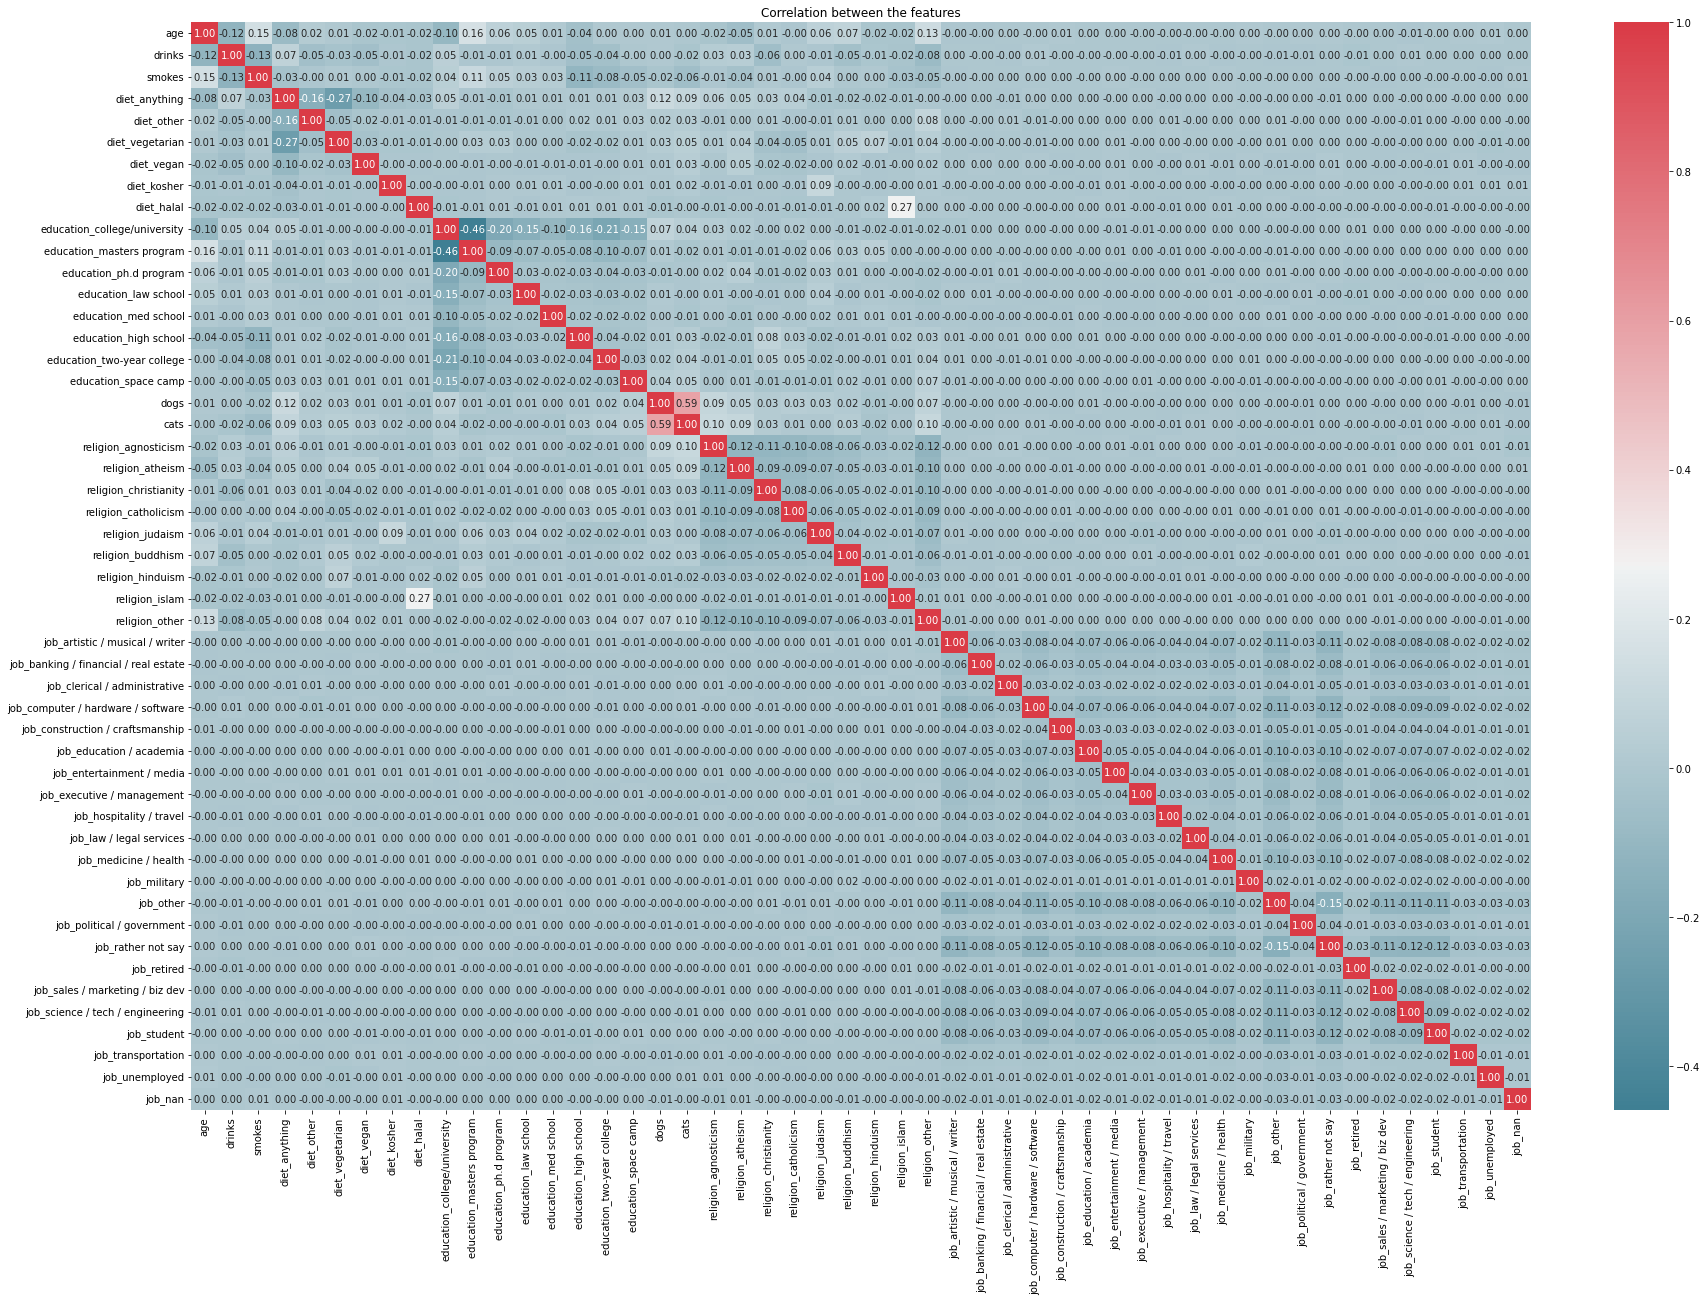

In [24]:
plt.rcParams['figure.figsize'] = [30, 20]
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
plt.title("Correlation between the features")